# Unsupervized Learning
### Das Ellbow-Kriterium zur Bestimmung der optimalen Anzahl von Clustern

In [1]:
import pandas as pd
# Wir nehmen den berühmten IRIS-Datensatz....
df = pd.read_csv("data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Jetzt tun wir mal so, wir wüssten nicht, dass es drei verschiedene Schwertlilienarten gäbe...
data = df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
data.head()
# "data" enthält also keine Information über die Klassenzugehörigkeit:

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

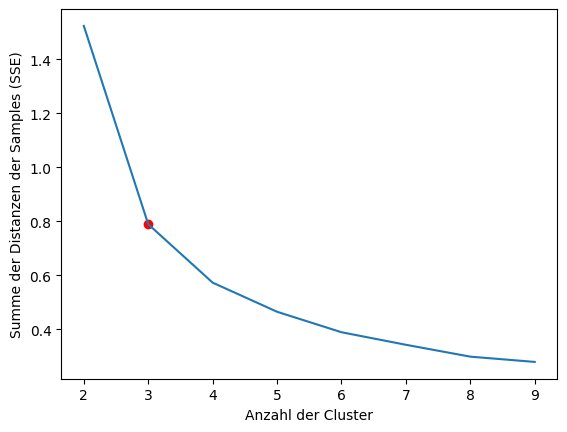

In [3]:
# Wir ermitteln die Distanzen der Objekte, die mit kMeans einem jeweiligen Cluster zugewiesen wurden.
import numpy as np
sse = {}
for k in range(2, 10):  # Wir probieren alle Clustergrößen von 1 bis 10 aus....
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ /100 # Inertia: Sum of distances of samples to their closest cluster center
   
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Anzahl der Cluster")
plt.ylabel("Summe der Distanzen der Samples (SSE)")

# Wo ist der Ellenbogen? - Dort wo die Kurve beginnt parallel zur X-Achse linear zu werden.  
#(O.K. - Wir wissen ja, dass "3" die richtige Lösung ist: Setosa, Virginica, Versicolor)
plt.scatter(3, sse[3], color='red')

plt.show()

In [4]:
# Fehlersummen über alle Cluster-Anzahlen von 1 bis 10
sse

{2: 1.5236870647733907,
 3: 0.7894084142614601,
 4: 0.5731787321428571,
 5: 0.46535582051282054,
 6: 0.3895701115711986,
 7: 0.34312650046008747,
 8: 0.29914633449883454,
 9: 0.2796431818181818}

In [5]:
# Entwicklung der Fehlersumme in %
for s in sse.values():
    print(100* s / sse[2])

100.0
51.80909075833523
37.61787741028718
30.54143014478044
25.56759327934159
22.519486342894087
19.633055987341134
18.35305872730314


In [6]:
# ab der 3.  ist es fast linear... Wir wissen, dass es eigentlich 3 Cluster sind, 
# ...das Ellbow-Kreterium lässt aber 4 Cluster fast plausibler erscheinen! - Mist!